# Publication-Ready SLEAP Behavior Classification

Framework demonstrating automated animal behavior classification using SLEAP pose estimation and machine learning.

Author: Prateek Verma  
Date: Aug 29, 2025

## Overview
- **Dataset**: 10 labeled videos, ~13 animals, 3 behaviors (sleeping, feeding, crawling)
- **Features**: 12 core engineered features (coordinates + distances + activity + curvature) 
- **Models**: 5 ML algorithms with proper validation strategies
- **Focus**: Methodology establishment and realistic performance benchmarks

In [1]:
# Import libraries and utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Import utils module
sys.path.append('.')
import utils

# Set style for publication-quality figures
plt.style.use('default')
sns.set_palette('Set2')
print("Libraries and utilities imported successfully")

Libraries and utilities imported successfully


In [2]:
# Reload utils if changes were made
import importlib
importlib.reload(utils)

print("Utils module reloaded successfully")

Utils module reloaded successfully


In [4]:
# Setup paths and directories
BASE_DIR = Path('.')
SLP_DIR = Path(BASE_DIR / 'data')
POSE_SLP = SLP_DIR / 'pub_videos_1-10 (inference labels).slp'

# Create output directory
STUDY_DIR = Path(BASE_DIR, 'results')
output_dir = Path(STUDY_DIR)
output_dir.mkdir(parents=True, exist_ok=True)

## Manual Behavior Labels

Expert-annotated behavior labels for frame ranges in each video. Based on frame-by-frame analysis by domain expert.

In [5]:
# Manual behavior annotations (expert domain knowledge)
behavior_labels = {
    'video1_L': {
        'sleeping': [],
        'feeding': [(1, 1647)],
        'crawling': []
    },
    'video2_L': {
        'sleeping': [],
        'feeding': [(42, 763), (810, 1279)],
        'crawling': [(1, 41), (764, 809)]
    },
    'video2_R': {
        'sleeping': [(284, 363), (774, 817), (984, 1098), (1123, 1241)],
        'feeding': [(1, 283), (364, 665), (686, 773)],
        'crawling': [(666, 774), (818, 983), (1099, 1122), (1242, 1279)]
    },
    'video3_L': {
        'sleeping': [(1, 203), (275, 1025)],
        'feeding': [],
        'crawling': [(204, 274)]
    },
    'video3_R': {
        'sleeping': [(753, 760)],
        'feeding': [(1, 45), (65, 97), (124, 138), (610, 686), (829, 852)],
        'crawling': [(46, 64), (98, 123), (139, 609), (687, 752), (761, 828), (853, 1026)]
    },
    'video4_L': {
        'sleeping': [(375, 603), (625, 854)],
        'feeding': [(1, 65), (197, 374), (604, 624), (855, 911)],
        'crawling': [(66, 196)]
    },
    'video5_L': {
        'sleeping': [(567, 578), (624, 632), (677, 721)],
        'feeding': [(140, 292), (381, 411)],
        'crawling': [(1, 139), (293, 380), (412, 566), (579, 610), (633, 676), (645, 673), (722, 911)]
    },
    'video5_R': {
        'sleeping': [(1, 65), (78, 274), (281, 509), (524, 721), (737, 903)],
        'feeding': [],
        'crawling': [(66, 77), (275, 280), (510, 523), (722, 736), (904, 911)]
    },
    'video6_L': {
        'sleeping': [(412, 443)],
        'feeding': [(1, 211), (278, 322), (444, 517), (539, 626), (793, 817), (828, 842), (1021, 1128), (1150, 1587)],
        'crawling': [(337, 411), (627, 792), (843, 1020)]
    },
    'video7_L': {
        'sleeping': [(995, 1422)],
        'feeding': [(1, 994), (1423, 1588)],
        'crawling': []
    },
    'video8_L': {
        'sleeping': [(1, 185), (567, 969)],
        'feeding': [(186, 566), (970, 1588)],
        'crawling': []
    },
    'video9_L': {
        'sleeping': [],
        'feeding': [(1, 74), (125, 134), (157, 216), (378, 929), (941, 1324), (1421, 1588)],
        'crawling': [(75, 124), (135, 156), (217, 377), (930, 940), (1325, 1420)]
    },
    'video10_L': {
        'sleeping': [(1183, 1291), (1350, 1441)],
        'feeding': [(1, 50), (72, 160), (276, 371), (751, 786), (827, 883), (1126, 1182), (1292, 1349), (1442, 1567)],
        'crawling': [(51, 71), (161, 275), (372, 750), (787, 826), (884, 1125), (1568, 1588)]
    }
}

print(f"Behavior labels loaded for {len(behavior_labels)} video tracks")

Behavior labels loaded for 13 video tracks


## Data Loading and Cleaning

Load SLEAP pose predictions and apply cleaning pipeline to remove missing coordinates and problematic tracks.

In [6]:
# Load SLEAP pose data
df_raw = utils.load_sleap_data(POSE_SLP)

# Clean pose data
df_clean = utils.clean_pose_data(df_raw)

# Add behavior labels
df_labeled = utils.add_behavior_labels(df_clean, behavior_labels)

# Save cleaned data
df_labeled.to_csv(output_dir / 'clean_labeled_data.csv', index=False)

Loaded 13714 labeled frames in 10 videos
Initial dataset: (18483, 17)
Rows with missing coordinates: 205
After removing missing coordinates: (18278, 17)
After removing video 1 right side animal: (16699, 17)
Adding behavior labels...
Final labeled dataset: (16552, 18)
Behavior distribution:
feeding     9165
sleeping    3817
crawling    3570
Name: behavior, dtype: int64


## Feature Engineering

Create 12 core features optimized for behavioral classification:
- **6 features**: Center-normalized coordinates (position-invariant)
- **4 features**: Inter-landmark distances (postural signatures) 
- **1 feature**: Body curvature (head-center-tail angle)
- **1 feature**: Activity level (velocity-based movement measure)

In [7]:
# Engineer core features
df_features, core_features = utils.engineer_core_features(df_labeled)

print(f"\nCore feature set ({len(core_features)} features):")
for i, feature in enumerate(core_features, 1):
    print(f"{i:2d}. {feature}")

print(f"\nFinal dataset shape: {df_features.shape}")
print(f"Features dataset saved to: {output_dir / 'features.csv'}")
df_features.to_csv(output_dir / 'features.csv', index=False)

Engineering core features...
Created 12 core features for publication

Core feature set (12 features):
 1. head_rel_x
 2. head_rel_y
 3. neck_rel_x
 4. neck_rel_y
 5. tail_rel_x
 6. tail_rel_y
 7. dist_head_neck
 8. dist_head_center
 9. dist_neck_center
10. dist_center_tail
11. body_curvature
12. activity_level

Final dataset shape: (16552, 30)
Features dataset saved to: results\features.csv


## Dataset Summary

Comprehensive characterization of the final clean dataset for publication reporting.

In [8]:
# First scale the features
df_scaled, scaler = utils.scale_features(df_features, core_features)

# Generate and display dataset summary
summary = utils.get_dataset_summary(df_scaled)
utils.print_dataset_summary(summary)

# Create animal summary table
print(f"\nINDIVIDUAL ANIMAL CHARACTERISTICS")
print("-" * 45)

animal_summary = []
for (video_id, track), group in df_scaled.groupby(['video_id', 'track']):
    animal_id = f"{video_id}_{track}"
    behavior_counts = group['behavior'].value_counts()
    total_frames = len(group)
    dominant_behavior = behavior_counts.index[0]
    
    animal_info = {
        'animal_id': animal_id,
        'video_id': video_id,
        'track': track,
        'total_frames': total_frames,
        'dominant_behavior': dominant_behavior,
        'sleeping_frames': behavior_counts.get('sleeping', 0),
        'feeding_frames': behavior_counts.get('feeding', 0),
        'crawling_frames': behavior_counts.get('crawling', 0)
    }
    animal_summary.append(animal_info)
    
    print(f"{animal_id:8s}: {total_frames:4d} frames, dominant: {dominant_behavior:8s}, "
          f"sleep/feed/crawl: {animal_info['sleeping_frames']:3d}/{animal_info['feeding_frames']:3d}/{animal_info['crawling_frames']:3d}")

# Save animal summary
animal_df = pd.DataFrame(animal_summary)
animal_df.to_csv(output_dir / 'animal_summary.csv', index=False)

print(f"\nTotal unique animals: {len(animal_summary)}")
print(f"Animal summary saved: {output_dir / 'animal_summary.csv'}")

Scaled 11 features using StandardScaler
DATASET SUMMARY
Total frames: 16,552
Total videos: 10
Total animals: 13

Behavior distribution:
  feeding: 9,165 frames (55.4%)
  sleeping: 3,817 frames (23.1%)
  crawling: 3,570 frames (21.6%)

Frames per video:
  Video 1: 1,647 frames
  Video 2: 2,544 frames
  Video 3: 2,005 frames
  Video 4: 911 frames
  Video 5: 1,669 frames
  Video 6: 1,455 frames
  Video 7: 1,588 frames
  Video 8: 1,588 frames
  Video 9: 1,571 frames
  Video 10: 1,574 frames

INDIVIDUAL ANIMAL CHARACTERISTICS
---------------------------------------------
1_track_1: 1647 frames, dominant: feeding , sleep/feed/crawl:   0/1647/  0
2_track_0: 1279 frames, dominant: feeding , sleep/feed/crawl:   0/1192/ 87
2_track_1: 1265 frames, dominant: feeding , sleep/feed/crawl: 357/670/238
3_track_0: 1025 frames, dominant: sleeping, sleep/feed/crawl: 954/  0/ 71
3_track_1:  980 frames, dominant: crawling, sleep/feed/crawl:   8/194/778
4_track_0:  911 frames, dominant: sleeping, sleep/feed/

## Machine Learning Experiments

Comprehensive evaluation of 5 ML algorithms across 3 validation strategies and 3 feature sets to assess behavioral classification performance.

### Experimental Design
- **Split Strategies**: Stratified random, Animal-level, Temporal blocks 
- **Models**: Random Forest (50 trees), SVM (RBF), Gradient Boosting (50 trees), KNN (k=5), Neural Network (12→6→3)
- **Feature Sets**: Relative coordinates (6), Coordinates + distances (10), All features (12)
- **Metrics**: Accuracy, precision, recall, F1-score

We start with **Stratified Random Split** to establish baseline performance with balanced class representation.

In [9]:
# Reload utils to get updated model parameters
import importlib
importlib.reload(utils)

# Run Stratified Random Split Experiments
print("STRATIFIED RANDOM SPLIT EXPERIMENTS")
print("=" * 50)

# Initialize results storage
random_results = []

# Define feature sets for systematic evaluation
feature_sets = {
    'relative_coords': ['head_rel_x', 'head_rel_y', 'neck_rel_x', 'neck_rel_y', 'tail_rel_x', 'tail_rel_y'],
    'coords_distances': ['head_rel_x', 'head_rel_y', 'neck_rel_x', 'neck_rel_y', 'tail_rel_x', 'tail_rel_y',
                        'dist_head_neck', 'dist_head_center', 'dist_neck_center', 'dist_center_tail'],
    'all_features': core_features  # All 12 features including activity and curvature
}

# Run experiments for each feature set
for feature_name, features in feature_sets.items():
    print(f"\n--- Feature Set: {feature_name.replace('_', ' ').title()} ({len(features)} features) ---")
    
    # Prepare data for this feature set
    X = df_scaled[features]
    y = df_scaled['behavior']
    
    # Create stratified random split (maintains class proportions)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Training set: {X_train.shape[0]} frames")
    print(f"Test set: {X_test.shape[0]} frames")
    print(f"Train class distribution: {y_train.value_counts().to_dict()}")
    print(f"Test class distribution: {y_test.value_counts().to_dict()}")
    
    # Evaluate all models on this feature set
    feature_results = utils.evaluate_models(df_scaled, features, test_size=0.2, random_state=42)
    models_dict, X_test_eval, y_test_eval = feature_results
    
    # Store results with metadata
    for model_name, metrics in models_dict.items():
        result = {
            'split_type': 'stratified_random',
            'feature_set': feature_name,
            'n_features': len(features),
            'model': model_name,
            'train_size': X_train.shape[0],
            'test_size': X_test.shape[0],
            'accuracy': metrics['accuracy'],
            'precision': metrics['precision'],
            'recall': metrics['recall'],
            'f1_score': metrics['f1_score']
        }
        random_results.append(result)

# Save stratified random results
random_df = pd.DataFrame(random_results)
random_df.to_csv(output_dir / 'stratified_random_results.csv', index=False)
print(f"\nStratified random results saved: {output_dir / 'stratified_random_results.csv'}")
print(f"Total experiments completed: {len(random_results)}")

# Display summary table
print(f"\nSTRATIFIED RANDOM SPLIT SUMMARY")
print("-" * 45)
summary_table = random_df.pivot_table(
    index='model', 
    columns='feature_set', 
    values='accuracy', 
    aggfunc='mean'
).round(3)
print(summary_table)

# Save best model confusion matrix for stratified random split
best_model_name, cm, accuracy = utils.save_best_model_confusion_matrix(
    models_dict=models_dict,  # From the last feature set evaluation (all_features)
    X_test=X_test_eval, 
    y_test=y_test_eval,
    split_type='stratified_random',
    output_dir=output_dir
)

STRATIFIED RANDOM SPLIT EXPERIMENTS

--- Feature Set: Relative Coords (6 features) ---
Training set: 13241 frames
Test set: 3311 frames
Train class distribution: {'feeding': 7332, 'sleeping': 3053, 'crawling': 2856}
Test class distribution: {'feeding': 1833, 'sleeping': 764, 'crawling': 714}
MODEL EVALUATION RESULTS

Random Forest:
  Accuracy:  0.979
  Precision: 0.979
  Recall:    0.979
  F1-Score:  0.979

SVM:
  Accuracy:  0.811
  Precision: 0.808
  Recall:    0.811
  F1-Score:  0.806

Gradient Boosting:
  Accuracy:  0.862
  Precision: 0.860
  Recall:    0.862
  F1-Score:  0.857

K-Nearest Neighbors:
  Accuracy:  0.966
  Precision: 0.966
  Recall:    0.966
  F1-Score:  0.966


c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.855
  Precision: 0.858
  Recall:    0.855
  F1-Score:  0.856

--- Feature Set: Coords Distances (10 features) ---
Training set: 13241 frames
Test set: 3311 frames
Train class distribution: {'feeding': 7332, 'sleeping': 3053, 'crawling': 2856}
Test class distribution: {'feeding': 1833, 'sleeping': 764, 'crawling': 714}
MODEL EVALUATION RESULTS

Random Forest:
  Accuracy:  0.977
  Precision: 0.977
  Recall:    0.977
  F1-Score:  0.977

SVM:
  Accuracy:  0.843
  Precision: 0.841
  Recall:    0.843
  F1-Score:  0.841

Gradient Boosting:
  Accuracy:  0.887
  Precision: 0.886
  Recall:    0.887
  F1-Score:  0.884

K-Nearest Neighbors:
  Accuracy:  0.945
  Precision: 0.945
  Recall:    0.945
  F1-Score:  0.945


c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.848
  Precision: 0.858
  Recall:    0.848
  F1-Score:  0.851

--- Feature Set: All Features (12 features) ---
Training set: 13241 frames
Test set: 3311 frames
Train class distribution: {'feeding': 7332, 'sleeping': 3053, 'crawling': 2856}
Test class distribution: {'feeding': 1833, 'sleeping': 764, 'crawling': 714}
MODEL EVALUATION RESULTS

Random Forest:
  Accuracy:  0.982
  Precision: 0.983
  Recall:    0.982
  F1-Score:  0.982

SVM:
  Accuracy:  0.873
  Precision: 0.872
  Recall:    0.873
  F1-Score:  0.873

Gradient Boosting:
  Accuracy:  0.893
  Precision: 0.892
  Recall:    0.893
  F1-Score:  0.892

K-Nearest Neighbors:
  Accuracy:  0.952
  Precision: 0.952
  Recall:    0.952
  F1-Score:  0.952


c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.889
  Precision: 0.891
  Recall:    0.889
  F1-Score:  0.890

Stratified random results saved: results\stratified_random_results.csv
Total experiments completed: 15

STRATIFIED RANDOM SPLIT SUMMARY
---------------------------------------------
feature_set          all_features  coords_distances  relative_coords
model                                                               
Gradient Boosting           0.893             0.887            0.862
K-Nearest Neighbors         0.952             0.945            0.966
Neural Network              0.889             0.848            0.855
Random Forest               0.982             0.977            0.979
SVM                         0.873             0.843            0.811
Best model for stratified_random: Random Forest (Accuracy: 0.982)
Confusion matrix saved: results\stratified_random_best_confusion_matrix.pkl


Next, we evaluate models using **temporal block-based splitting** to address temporal dependency issues in behavioral time series. This approach:

- Divides data into 15-frame temporal blocks (chunks of consecutive frames)
- Performs stratified sampling at block level (20% of blocks per behavior → test set)
- Ensures temporal independence between train/test sets (no temporal overlap)
- Maintains class balance while respecting temporal structure

In [10]:
# Reload utils to get temporal block functions
import importlib
importlib.reload(utils)

# Run Temporal Block Split Experiments
print("TEMPORAL BLOCK SPLIT EXPERIMENTS")
print("=" * 50)

# Initialize results storage
temporal_results = []

# Define feature sets for systematic evaluation
feature_sets = {
    'relative_coords': ['head_rel_x', 'head_rel_y', 'neck_rel_x', 'neck_rel_y', 'tail_rel_x', 'tail_rel_y'],
    'coords_distances': ['head_rel_x', 'head_rel_y', 'neck_rel_x', 'neck_rel_y', 'tail_rel_x', 'tail_rel_y',
                        'dist_head_neck', 'dist_head_center', 'dist_neck_center', 'dist_center_tail'],
    'all_features': core_features  # All 12 features including activity and curvature
}

# Run experiments for each feature set
for feature_name, features in feature_sets.items():
    print(f"\n--- Feature Set: {feature_name.replace('_', ' ').title()} ({len(features)} features) ---")
    
    # Evaluate all models on this feature set using temporal blocks
    feature_results = utils.evaluate_models_temporal_blocks(
        df_scaled, features, block_size=15, test_size=0.2, random_state=42
    )
    models_dict, X_test_eval, y_test_eval, block_info = feature_results
    
    # Store results with metadata
    for model_name, metrics in models_dict.items():
        result = {
            'split_type': 'temporal_blocks',
            'feature_set': feature_name,
            'n_features': len(features),
            'model': model_name,
            'train_size': block_info['train_frames'],
            'test_size': block_info['test_frames'],
            'train_blocks': block_info['train_blocks'],
            'test_blocks': block_info['test_blocks'],
            'block_size': block_info['block_size'],
            'accuracy': metrics['accuracy'],
            'precision': metrics['precision'],
            'recall': metrics['recall'],
            'f1_score': metrics['f1_score']
        }
        temporal_results.append(result)

# Save temporal block results
temporal_df = pd.DataFrame(temporal_results)
temporal_df.to_csv(output_dir / 'temporal_block_results.csv', index=False)
print(f"\nTemporal block results saved: {output_dir / 'temporal_block_results.csv'}")
print(f"Total experiments completed: {len(temporal_results)}")

# Display summary table
print(f"\nTEMPORAL BLOCK SPLIT SUMMARY")
print("-" * 45)
summary_table = temporal_df.pivot_table(
    index='model', 
    columns='feature_set', 
    values='accuracy', 
    aggfunc='mean'
).round(3)
print(summary_table)

# Save best model confusion matrix for temporal blocks split  
best_model_name, cm, accuracy = utils.save_best_model_confusion_matrix(
    models_dict=models_dict,  # From the last feature set evaluation (all_features)
    X_test=X_test_eval,
    y_test=y_test_eval, 
    split_type='temporal_blocks',
    output_dir=output_dir
)

TEMPORAL BLOCK SPLIT EXPERIMENTS

--- Feature Set: Relative Coords (6 features) ---
TEMPORAL BLOCK SPLIT CREATION
Block size: 15 frames
Test proportion: 20.0%

Processing video1_track_1 (1647 frames)...
  feeding: 110 blocks → 88 train, 22 test

Processing video2_track_0 (1279 frames)...
  crawling: 4 blocks → 3 train, 1 test
  feeding: 79 blocks → 64 train, 15 test

Processing video2_track_1 (1265 frames)...
  feeding: 42 blocks → 34 train, 8 test
  sleeping: 21 blocks → 17 train, 4 test
  crawling: 12 blocks → 10 train, 2 test

Processing video3_track_0 (1025 frames)...
  sleeping: 63 blocks → 51 train, 12 test
  crawling: 4 blocks → 3 train, 1 test

Processing video3_track_1 (980 frames)...
  feeding: 9 blocks → 8 train, 1 test
  crawling: 47 blocks → 38 train, 9 test

Processing video4_track_0 (911 frames)...
  feeding: 18 blocks → 15 train, 3 test
  crawling: 8 blocks → 7 train, 1 test
  sleeping: 29 blocks → 24 train, 5 test

Processing video5_track_0 (771 frames)...
  sleeping: 

c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.832
  Precision: 0.831
  Recall:    0.832
  F1-Score:  0.831

--- Feature Set: Coords Distances (10 features) ---
TEMPORAL BLOCK SPLIT CREATION
Block size: 15 frames
Test proportion: 20.0%

Processing video1_track_1 (1647 frames)...
  feeding: 110 blocks → 88 train, 22 test

Processing video2_track_0 (1279 frames)...
  crawling: 4 blocks → 3 train, 1 test
  feeding: 79 blocks → 64 train, 15 test

Processing video2_track_1 (1265 frames)...
  feeding: 42 blocks → 34 train, 8 test
  sleeping: 21 blocks → 17 train, 4 test
  crawling: 12 blocks → 10 train, 2 test

Processing video3_track_0 (1025 frames)...
  sleeping: 63 blocks → 51 train, 12 test
  crawling: 4 blocks → 3 train, 1 test

Processing video3_track_1 (980 frames)...
  feeding: 9 blocks → 8 train, 1 test
  crawling: 47 blocks → 38 train, 9 test

Processing video4_track_0 (911 frames)...
  feeding: 18 blocks → 15 train, 3 test
  crawling: 8 blocks → 7 train, 1 test
  sleeping: 29 blocks → 24 train, 

c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.868
  Precision: 0.868
  Recall:    0.868
  F1-Score:  0.867

--- Feature Set: All Features (12 features) ---
TEMPORAL BLOCK SPLIT CREATION
Block size: 15 frames
Test proportion: 20.0%

Processing video1_track_1 (1647 frames)...
  feeding: 110 blocks → 88 train, 22 test

Processing video2_track_0 (1279 frames)...
  crawling: 4 blocks → 3 train, 1 test
  feeding: 79 blocks → 64 train, 15 test

Processing video2_track_1 (1265 frames)...
  feeding: 42 blocks → 34 train, 8 test
  sleeping: 21 blocks → 17 train, 4 test
  crawling: 12 blocks → 10 train, 2 test

Processing video3_track_0 (1025 frames)...
  sleeping: 63 blocks → 51 train, 12 test
  crawling: 4 blocks → 3 train, 1 test

Processing video3_track_1 (980 frames)...
  feeding: 9 blocks → 8 train, 1 test
  crawling: 47 blocks → 38 train, 9 test

Processing video4_track_0 (911 frames)...
  feeding: 18 blocks → 15 train, 3 test
  crawling: 8 blocks → 7 train, 1 test
  sleeping: 29 blocks → 24 train, 5 te

c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.890
  Precision: 0.895
  Recall:    0.890
  F1-Score:  0.890

Temporal block results saved: results\temporal_block_results.csv
Total experiments completed: 15

TEMPORAL BLOCK SPLIT SUMMARY
---------------------------------------------
feature_set          all_features  coords_distances  relative_coords
model                                                               
Gradient Boosting           0.890             0.873            0.845
K-Nearest Neighbors         0.909             0.897            0.912
Neural Network              0.890             0.868            0.832
Random Forest               0.936             0.913            0.910
SVM                         0.882             0.839            0.827
Best model for temporal_blocks: Random Forest (Accuracy: 0.936)
Confusion matrix saved: results\temporal_blocks_best_confusion_matrix.pkl


Finally, we assess **Animal-Level Splitting** to test cross-individual generalization by using complete animals as test subjects. This approach evaluates whether models trained on some individuals can generalize to unseen individuals, addressing the critical question of model robustness across different animals.

In [11]:
# Reload utils to get animal split functions
import importlib
importlib.reload(utils)

# Animal-Level Split Experiment
print("ANIMAL-LEVEL SPLIT EXPERIMENT")
print("=" * 50)

# Initialize results storage
animal_results = []

# Create animal_id column
df_scaled['animal_id'] = df_scaled['video_id'].astype(str) + '_track_' + df_scaled['track'].astype(str)

# Select test animals for cross-individual generalization
# Rationale: Choose animals with different behavioral profiles to test generalization
# - 1_track_track_1: Pure feeding behavior (1647 frames, 100% feeding)
# - 2_track_track_1: Mixed behaviors (1265 frames, 53% feeding, 28% sleeping, 19% crawling)
# This combination provides a realistic test set with feeding bias but behavioral variation
test_animals = ['1_track_track_1', '2_track_track_1']

print(f"Test animals: {', '.join(test_animals)}")
print("Rationale: Pure feeding animal + mixed behaviors animal for realistic cross-individual test")

# Create train/test split
test_mask = df_scaled['animal_id'].isin(test_animals)
train_data = df_scaled[~test_mask]
test_data = df_scaled[test_mask]

print(f"\nData split:")
print(f"  Train: {len(train_data):5d} frames from {len(train_data['animal_id'].unique()):2d} animals")
print(f"  Test:  {len(test_data):5d} frames from {len(test_animals):2d} animals ({len(test_data)/len(df_scaled)*100:4.1f}%)")

# Show behavioral distributions
train_dist = train_data['behavior'].value_counts()
test_dist = test_data['behavior'].value_counts()

print(f"\nBehavioral distribution:")
print("  Train set:")
for behavior in ['sleeping', 'feeding', 'crawling']:
    count = train_dist.get(behavior, 0)
    pct = (count / len(train_data)) * 100
    print(f"    {behavior:8s}: {count:4d} frames ({pct:5.1f}%)")

print("  Test set:")
for behavior in ['sleeping', 'feeding', 'crawling']:
    count = test_dist.get(behavior, 0)
    pct = (count / len(test_data)) * 100 if len(test_data) > 0 else 0
    print(f"    {behavior:8s}: {count:4d} frames ({pct:5.1f}%)")

# Run experiments for each feature set
for feature_name, features in feature_sets.items():
    print(f"\n--- Feature Set: {feature_name.replace('_', ' ').title()} ({len(features)} features) ---")
    
    # Evaluate all models on this feature set using animal-level split
    feature_results = utils.evaluate_models_animal_split(
        df_scaled, features, test_animals, random_state=42
    )
    models_dict, X_test_eval, y_test_eval = feature_results
    
    # Store results with metadata
    for model_name, metrics in models_dict.items():
        result = {
            'split_type': 'animal_level',
            'feature_set': feature_name,
            'n_features': len(features),
            'model': model_name,
            'train_size': len(train_data),
            'test_size': len(test_data),
            'test_animals': ', '.join(test_animals),
            'accuracy': metrics['accuracy'],
            'precision': metrics['precision'],
            'recall': metrics['recall'],
            'f1_score': metrics['f1_score']
        }
        animal_results.append(result)

# Save animal-level results
animal_df = pd.DataFrame(animal_results)
animal_df.to_csv(output_dir / 'animal_level_results.csv', index=False)
print(f"\nAnimal-level results saved: {output_dir / 'animal_level_results.csv'}")
print(f"Total experiments completed: {len(animal_results)}")

# Display summary table
print(f"\nANIMAL-LEVEL SPLIT SUMMARY")
print("-" * 45)
summary_table = animal_df.pivot_table(
    index='model', 
    columns='feature_set', 
    values='accuracy', 
    aggfunc='mean'
).round(3)
print(summary_table)

# Save best model confusion matrix for animal-level split
best_model_name, cm, accuracy = utils.save_best_model_confusion_matrix(
    models_dict=models_dict,  # From the last feature set evaluation (all_features)
    X_test=X_test_eval,
    y_test=y_test_eval,
    split_type='animal_level', 
    output_dir=output_dir
)

ANIMAL-LEVEL SPLIT EXPERIMENT
Test animals: 1_track_track_1, 2_track_track_1
Rationale: Pure feeding animal + mixed behaviors animal for realistic cross-individual test

Data split:
  Train: 13640 frames from 11 animals
  Test:   2912 frames from  2 animals (17.6%)

Behavioral distribution:
  Train set:
    sleeping: 3460 frames ( 25.4%)
    feeding : 6848 frames ( 50.2%)
    crawling: 3332 frames ( 24.4%)
  Test set:
    sleeping:  357 frames ( 12.3%)
    feeding : 2317 frames ( 79.6%)
    crawling:  238 frames (  8.2%)

--- Feature Set: Relative Coords (6 features) ---

MODEL EVALUATION RESULTS (Animal-Level Split)

Random Forest:
  Accuracy:  0.170
  Precision: 0.369
  Recall:    0.170
  F1-Score:  0.204

SVM:
  Accuracy:  0.187
  Precision: 0.470
  Recall:    0.187
  F1-Score:  0.262

Gradient Boosting:
  Accuracy:  0.196
  Precision: 0.404
  Recall:    0.196
  F1-Score:  0.257

K-Nearest Neighbors:
  Accuracy:  0.223
  Precision: 0.493
  Recall:    0.223
  F1-Score:  0.277


c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.122
  Precision: 0.310
  Recall:    0.122
  F1-Score:  0.157

--- Feature Set: Coords Distances (10 features) ---

MODEL EVALUATION RESULTS (Animal-Level Split)

Random Forest:
  Accuracy:  0.131
  Precision: 0.310
  Recall:    0.131
  F1-Score:  0.152

SVM:
  Accuracy:  0.214
  Precision: 0.492
  Recall:    0.214
  F1-Score:  0.283

Gradient Boosting:
  Accuracy:  0.171
  Precision: 0.364
  Recall:    0.171
  F1-Score:  0.226

K-Nearest Neighbors:
  Accuracy:  0.244
  Precision: 0.571
  Recall:    0.244
  F1-Score:  0.308


c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



Neural Network:
  Accuracy:  0.134
  Precision: 0.457
  Recall:    0.134
  F1-Score:  0.162

--- Feature Set: All Features (12 features) ---

MODEL EVALUATION RESULTS (Animal-Level Split)

Random Forest:
  Accuracy:  0.224
  Precision: 0.429
  Recall:    0.224
  F1-Score:  0.269

SVM:
  Accuracy:  0.729
  Precision: 0.658
  Recall:    0.729
  F1-Score:  0.691

Gradient Boosting:
  Accuracy:  0.258
  Precision: 0.497
  Recall:    0.258
  F1-Score:  0.305


c:\Users\Prateek\miniconda3\envs\sleap\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"



K-Nearest Neighbors:
  Accuracy:  0.696
  Precision: 0.721
  Recall:    0.696
  F1-Score:  0.697

Neural Network:
  Accuracy:  0.733
  Precision: 0.674
  Recall:    0.733
  F1-Score:  0.700

Animal-level results saved: results\animal_level_results.csv
Total experiments completed: 15

ANIMAL-LEVEL SPLIT SUMMARY
---------------------------------------------
feature_set          all_features  coords_distances  relative_coords
model                                                               
Gradient Boosting           0.258             0.171            0.196
K-Nearest Neighbors         0.696             0.244            0.223
Neural Network              0.733             0.134            0.122
Random Forest               0.224             0.131            0.170
SVM                         0.729             0.214            0.187
Best model for animal_level: Neural Network (Accuracy: 0.733)
Confusion matrix saved: results\animal_level_best_confusion_matrix.pkl


## Timeline Visualization and Analysis

Create comprehensive behavior timeline showing ground truth and predictions from all validation strategies. This visualization provides visual comparison of model performance across individual animals and validation approaches, with train/test frame differentiation through color coding.

### Visualization Features
- **Ground Truth**: Expert-labeled behaviors from cleaned dataset
- **Stratified RF**: Random Forest predictions using stratified random split
- **Temporal RF**: Random Forest predictions using temporal block split  
- **Animal-Level NN**: Neural Network predictions using animal-level split
- **Color Coding**: Dark colors for training frames, light colors for test frames
- **Missing Data**: Gaps represent frames with missing/invalid pose data

CREATING BEHAVIOR TIMELINE VISUALIZATION
animals: ['10_track_track_0', '9_track_track_0', '8_track_track_0', '7_track_track_0', '6_track_track_0', '5_track_track_1', '5_track_track_0', '4_track_track_0', '3_track_track_1', '3_track_track_0', '2_track_track_1', '2_track_track_0', '1_track_track_1']
Generating predictions for 13 animals using best performing models...

1. Training Stratified Random Forest...
2. Training Temporal Block Random Forest...
3. Training Animal-Level Neural Network...
4. Creating timeline visualization...
total height: 7.26
Timeline saved: results\behavior_timeline.png

Timeline visualization completed!
- 13 animals visualized
- 4 rows per animal (ground truth + 3 predictions)
- Test frames shown in light colors, train frames in dark colors


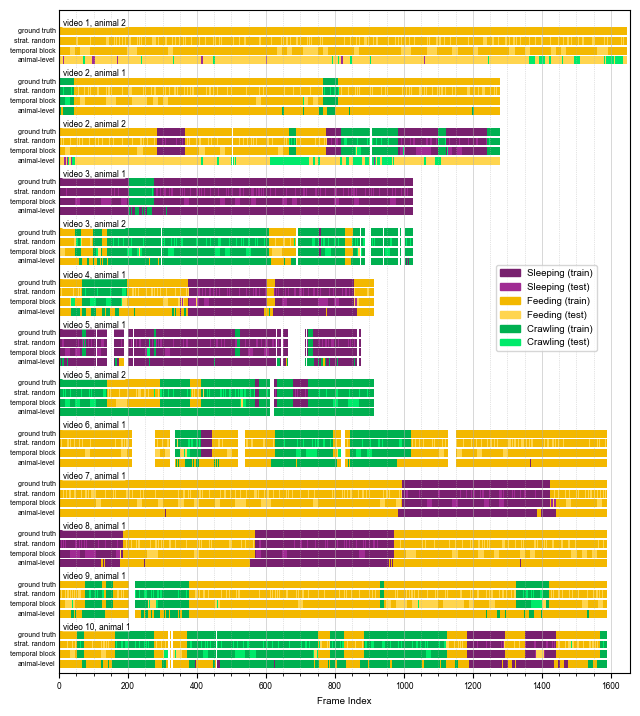

In [12]:
# Reload utils
import importlib
importlib.reload(utils)

# Configure behavior color scheme (easily modifiable)
behavior_colors = {
    'sleeping': {
        'train': '#78206E',  # Dark violet
        'test': '#A02B93'    # Light violet
    },
    'feeding': {
        'train': '#F3B800',  # Dark yellow/goldenrod  
        'test': '#FFD54F'    # Light yellow
    },
    'crawling': {
        'train': '#00B050',  # Dark green
        'test': '#00EA6A'    # Light green
    }
}

# Visualization parameters
figure_width = 6.5  # inches
save_dpi = 1200

# Create the timeline visualization using best performing models
fig, predictions_dict = utils.create_behavior_timeline_visualization(
    df_scaled=df_scaled,
    core_features=core_features,  # Use all 12 features for best performance
    test_animals=test_animals,    # Same test animals as animal-level split
    behavior_colors=behavior_colors,
    figure_width=figure_width,
    save_dpi=save_dpi,
    output_dir=output_dir
)

plt.show()

Confusion matrices plot saved: results\confusion_matrices_best_models.png


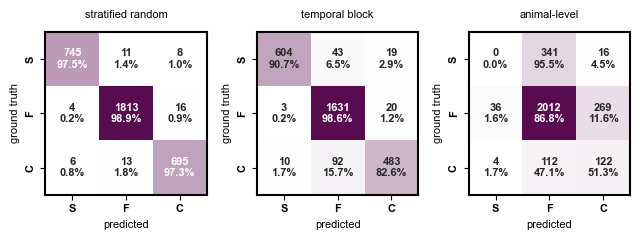

In [13]:
## Confusion Matrices for Best Performing Models

importlib.reload(utils)
utils.plot_confusion_matrices_from_saved(output_dir)